# Chapter 3: Numerical Operations and Financial Simulations with Numpy

This chapter delves deep into the power of NumPy, a fundamental library for numerical computing in Python. NumPy's ability to handle large arrays of data efficiently makes it an indispensable tool for financial analysts and quantitative traders. By mastering NumPy 's array operations, you'll unlock the ability to perform complex calculations, simulations, and statistical analyses on financial data at unprecedented speeds.

#### Learning Outcomes with NumPy:

- **Efficiently manipulate financial data:** Perform vectorized operations on stock prices, returns, and other financial time series for rapid calculations and analysis.

- **Analyze market trends:** Utilize NumPy 's array functions to calculate moving averages, correlations, and other statistical measures for identifying market patterns and trends.

- **Assess risk:** Employ NumPy to compute volatility, value at risk (VaR), and other risk metrics to evaluate portfolio performance and manage risk effectively.

- **Simulate financial scenarios:** Build Monte Carlo simulations and other stochastic models to assess potential outcomes and make informed investment decisions.

Through practical examples and code implementations, this chapter will equip you with the essential NumPy skills to tackle a wide range of financial data analysis challenges and contribute to your quantitative modeling toolkit.

## 3.1 Fetching Financial Data with Tiingo API

We'll fetch historical stock data for multiple companies using the Tiingo API and create a 2D array for more complex operations.

In [1]:
from tiingo import TiingoClient
import os

# Set Tiingo API key
os.environ['TIINGO_API_KEY'] = ''
client = TiingoClient()

In [2]:
import numpy as np
import pandas as pd

# Fetching stock data for multiple tickers
tickers = ["MSFT", "AAPL", "GOOGL"]
start_date = '2023-01-01'
end_date = '2023-01-31'
data = {}

# Stores the extracted closing prices in the data dictionary with the ticker as the key.
for ticker in tickers:
    historical_prices = client.get_ticker_price(ticker, fmt='json', startDate=start_date, endDate=end_date, frequency='daily')
    dates = [entry['date'] for entry in historical_prices]
    prices = [entry['close'] for entry in historical_prices]
    data[ticker] = prices

In [3]:
# Displaying the fetched data
data

{'MSFT': [239.58,
  229.1,
  222.31,
  224.93,
  227.12,
  228.85,
  235.77,
  238.51,
  239.23,
  240.35,
  235.81,
  231.93,
  240.22,
  242.58,
  242.04,
  240.61,
  248.0,
  248.16,
  242.71,
  247.81],
 'AAPL': [125.07,
  126.36,
  125.02,
  129.62,
  130.15,
  130.73,
  133.49,
  133.41,
  134.76,
  135.94,
  135.21,
  135.27,
  137.87,
  141.11,
  142.53,
  141.86,
  143.96,
  145.93,
  143.0,
  144.29],
 'GOOGL': [89.12,
  88.08,
  86.2,
  87.34,
  88.02,
  88.42,
  91.52,
  91.13,
  92.12,
  91.29,
  91.12,
  93.05,
  98.02,
  99.79,
  97.7,
  95.22,
  97.52,
  99.37,
  96.94,
  98.84]}

In [4]:
# Converting data format to a pandas DataFrame and displaying the new DataFrame

df = pd.DataFrame(data, index=dates)
print("DataFrame:\n", df.head())

DataFrame:
                             MSFT    AAPL  GOOGL
2023-01-03T00:00:00.000Z  239.58  125.07  89.12
2023-01-04T00:00:00.000Z  229.10  126.36  88.08
2023-01-05T00:00:00.000Z  222.31  125.02  86.20
2023-01-06T00:00:00.000Z  224.93  129.62  87.34
2023-01-09T00:00:00.000Z  227.12  130.15  88.02


`pd.DataFrame(data, index=dates)` creates a DataFrame , which is a two-dimensional, labeled data structure similar to a spreadsheet. The DataFrame contains the historical stock data stored in the data dictionary.

In [5]:
# Converting the DataFrame to a 2D NumPy array for numerical operations

matrix = df.values
print("2D Array:\n", matrix)

2D Array:
 [[239.58 125.07  89.12]
 [229.1  126.36  88.08]
 [222.31 125.02  86.2 ]
 [224.93 129.62  87.34]
 [227.12 130.15  88.02]
 [228.85 130.73  88.42]
 [235.77 133.49  91.52]
 [238.51 133.41  91.13]
 [239.23 134.76  92.12]
 [240.35 135.94  91.29]
 [235.81 135.21  91.12]
 [231.93 135.27  93.05]
 [240.22 137.87  98.02]
 [242.58 141.11  99.79]
 [242.04 142.53  97.7 ]
 [240.61 141.86  95.22]
 [248.   143.96  97.52]
 [248.16 145.93  99.37]
 [242.71 143.    96.94]
 [247.81 144.29  98.84]]


`matrix = df.values` stores the values of the DataFrame in a NumPy array called matrix.

## Numpy Basics

### 3.1.1 1D Array Objects

An array is a fundamental data structure in NumPy that represents a collection of elements, all of the same type, arranged in a grid-like structure. Arrays can be one-dimensional (like a list), two-dimensional (like a table), or even higher-dimensional. In this section, we'll work with 1D arrays derived from the previously fetched stock prices.

In [6]:
# Creating a NumPy array from MSFT stock prices
arr = np.array(data["MSFT"])

In [7]:
# Displaying the array and its type
print("Array:", arr)
print("Type:", type(arr))

Array: [239.58 229.1  222.31 224.93 227.12 228.85 235.77 238.51 239.23 240.35
 235.81 231.93 240.22 242.58 242.04 240.61 248.   248.16 242.71 247.81]
Type: <class 'numpy.ndarray'>


#### Vector Operations:
Vector operations involve mathematical manipulations of vectors, which are quantities that have both magnitude and direction. In programming and data science, vectors are often represented as arrays or lists of numbers. These operations are fundamental in fields like physics, engineering, and data analysis.

In [8]:
print("Scalar multiplication:", 2 * arr)  # Multiplying each element in the array by 2


Scalar multiplication: [479.16 458.2  444.62 449.86 454.24 457.7  471.54 477.02 478.46 480.7
 471.62 463.86 480.44 485.16 484.08 481.22 496.   496.32 485.42 495.62]


In [9]:
print("Element-wise addition:", arr + arr)  # Adding the array to itself element-wise

Element-wise addition: [479.16 458.2  444.62 449.86 454.24 457.7  471.54 477.02 478.46 480.7
 471.62 463.86 480.44 485.16 484.08 481.22 496.   496.32 485.42 495.62]


In [10]:
print("Division:", arr / 2)  # Dividing each element in the array by 2


Division: [119.79  114.55  111.155 112.465 113.56  114.425 117.885 119.255 119.615
 120.175 117.905 115.965 120.11  121.29  121.02  120.305 124.    124.08
 121.355 123.905]


In [11]:
print("Element-wise exponentiation:", arr ** 2)  # Squaring each element in the array

Element-wise exponentiation: [57398.5764 52486.81   49421.7361 50593.5049 51583.4944 52372.3225
 55587.4929 56887.0201 57230.9929 57768.1225 55606.3561 53791.5249
 57705.6484 58845.0564 58583.3616 57893.1721 61504.     61583.3856
 58908.1441 61409.7961]


**Array Statistics:**

In [12]:
print("Sum:", arr.sum())  # Calculating the sum of all elements in the array


Sum: 4745.620000000001


In [13]:
print("Mean:", arr.mean())  # Calculating the mean of the array

Mean: 237.28100000000003


In [14]:
print("Standard deviation:", arr.std())  # Calculating the standard deviation of the array

Standard deviation: 7.466789068937197


**Mathematical Functions:**

In [15]:
print("Square root:", np.sqrt(arr))  # Calculating the square root of each element in the array

Square root: [15.47837201 15.13604968 14.91006372 14.99766649 15.07050099 15.127789
 15.35480381 15.44376897 15.46706178 15.50322547 15.35610628 15.22924818
 15.49903223 15.57497994 15.55763478 15.51160856 15.74801575 15.75309493
 15.57915274 15.74198209]


In [16]:
print("Exponential:", np.exp(arr))  # Calculating the exponential (e^x) of each element in the array


Exponential: [1.11756290e+104 3.13953843e+099 3.53188270e+096 4.85129646e+097
 4.33473677e+098 2.44507499e+099 2.47519830e+102 3.83333592e+103
 7.87533262e+103 2.41367463e+104 2.57621306e+102 5.32009255e+100
 2.11943666e+104 2.24468508e+105 1.30808631e+105 3.13036725e+104
 5.07027496e+107 5.95002279e+107 2.55631108e+105 4.19291019e+107]


In [17]:
print("Maximum value:", np.max(arr))  # Finding the maximum value in the array

Maximum value: 248.16


### 3.1.2 2D Array Objects

We'll create a 2D array from the stock prices of multiple companies (MSFT , AAPL , and GOOGL ) for more complex operations. Each column in the 2D array corresponds to the stock prices of one company.

#### Vector Operations:

In [18]:
print("Scalar multiplication:\n", 2 * matrix)  # Multiplying each element in the 2D array by 2

Scalar multiplication:
 [[479.16 250.14 178.24]
 [458.2  252.72 176.16]
 [444.62 250.04 172.4 ]
 [449.86 259.24 174.68]
 [454.24 260.3  176.04]
 [457.7  261.46 176.84]
 [471.54 266.98 183.04]
 [477.02 266.82 182.26]
 [478.46 269.52 184.24]
 [480.7  271.88 182.58]
 [471.62 270.42 182.24]
 [463.86 270.54 186.1 ]
 [480.44 275.74 196.04]
 [485.16 282.22 199.58]
 [484.08 285.06 195.4 ]
 [481.22 283.72 190.44]
 [496.   287.92 195.04]
 [496.32 291.86 198.74]
 [485.42 286.   193.88]
 [495.62 288.58 197.68]]


In [19]:
print("Element-wise exponentiation:\n", matrix ** 2)  # Squaring each element in the 2D array

Element-wise exponentiation:
 [[57398.5764 15642.5049  7942.3744]
 [52486.81   15966.8496  7758.0864]
 [49421.7361 15630.0004  7430.44  ]
 [50593.5049 16801.3444  7628.2756]
 [51583.4944 16939.0225  7747.5204]
 [52372.3225 17090.3329  7818.0964]
 [55587.4929 17819.5801  8375.9104]
 [56887.0201 17798.2281  8304.6769]
 [57230.9929 18160.2576  8486.0944]
 [57768.1225 18479.6836  8333.8641]
 [55606.3561 18281.7441  8302.8544]
 [53791.5249 18297.9729  8658.3025]
 [57705.6484 19008.1369  9607.9204]
 [58845.0564 19912.0321  9958.0441]
 [58583.3616 20314.8009  9545.29  ]
 [57893.1721 20124.2596  9066.8484]
 [61504.     20724.4816  9510.1504]
 [61583.3856 21295.5649  9874.3969]
 [58908.1441 20449.      9397.3636]
 [61409.7961 20819.6041  9769.3456]]


#### Aggregation Functions:

In [20]:
print("Sum of all elements:", matrix.sum())  # Calculating the sum of all elements in the 2D array

Sum of all elements: 9322.010000000002


In [21]:
print("Sum along columns:", matrix.sum(axis=0))  # Calculating the sum of each column (sum along rows)

Sum along columns: [4745.62 2715.58 1860.81]


`axis=0` specifies that the operation is performed *down the columns*.

In [22]:
print("Sum along rows:", matrix.sum(axis=1))  # Calculating the sum of each row (sum along columns)

Sum along rows: [453.77 443.54 433.53 441.89 445.29 448.   460.78 463.05 466.11 467.58
 462.14 460.25 476.11 483.48 482.27 477.69 489.48 493.46 482.65 490.94]


`axis=1` specifies that the operation is performed *along the rows*.

In [23]:
print("Mean of all elements:", matrix.mean())  # Calculating the mean of all elements in the 2D array

Mean of all elements: 155.36683333333337


In [24]:
print("Mean along columns:", matrix.mean(axis=0))  # Calculating the mean of each column

Mean along columns: [237.281  135.779   93.0405]


In [25]:
print("Square root of each element:\n", np.sqrt(matrix))  # Calculating the square root of each element in the 2D array

Square root of each element:
 [[15.47837201 11.18346994  9.44033898]
 [15.13604968 11.2409964   9.38509457]
 [14.91006372 11.18123428  9.28439551]
 [14.99766649 11.38507795  9.34558719]
 [15.07050099 11.40833029  9.38189746]
 [15.127789   11.43372205  9.40319095]
 [15.35480381 11.55378726  9.56660859]
 [15.44376897 11.55032467  9.54620343]
 [15.46706178 11.60861749  9.59791644]
 [15.50322547 11.65933103  9.55458005]
 [15.35610628 11.62798349  9.54567965]
 [15.22924818 11.63056318  9.64624279]
 [15.49903223 11.74180565  9.90050504]
 [15.57497994 11.87897302  9.98949448]
 [15.55763478 11.93859288  9.88433103]
 [15.51160856 11.91049957  9.75807358]
 [15.74801575 11.99833322  9.87522152]
 [15.75309493 12.08014901  9.96845023]
 [15.57915274 11.95826074  9.84581129]
 [15.74198209 12.01207726  9.94183082]]


## 3.2 Random Numbers Generation

Random number generation is essential in finance for modeling uncertain outcomes, simulating market conditions, managing risk, pricing complex instruments, and optimizing portfolios. These techniques help financial professionals make better-informed decisions in an environment of uncertainty and risk.

In [26]:
import random
import time

# Sets the value of the variable N to 500,000. This sets the number of random numbers to generate.
N = 500000

# Records the current time using the time.time() function and stores it in the start variable.
start = time.time()

# Creates a list called rand_lst containing N random numbers.
rand_lst = [random.gauss(0, 1) for _ in range(N)]
print("Time to generate random numbers with list:", time.time() - start)

Time to generate random numbers with list: 0.186112642288208


#### Code Breakdown:

The outputs make sense given the assumption of random.gauss(0, 1), which generates random numbers from a normal distribution with a mean of 0 and a standard deviation of 1.

#### Using Numpy:

In [27]:
# Generating 500,000 random numbers using NumPy's standard normal function and measuring the time taken.

start = time.time()
rand_arr = np.random.standard_normal(N)
print("Time to generate random numbers with NumPy (legacy):", time.time() - start)

Time to generate random numbers with NumPy (legacy): 0.008997440338134766


**Using Numpy `default_rng`:**

In [28]:
from numpy.random import default_rng

# Creates a random number generator instance named rng using the default_rng function.
rng = default_rng()

start = time.time()

# This generator will be used to produce random numbers.
rand_arr = rng.standard_normal(N)
print("Time to generate random numbers with NumPy (new):", time.time() - start)

Time to generate random numbers with NumPy (new): 0.0050182342529296875


**Visualization:**

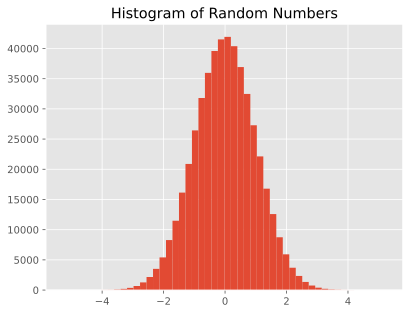

In [29]:
import matplotlib.pyplot as plt

# Use a built-in style (e.g., 'ggplot')
plt.style.use('ggplot')

# Sets the output format to SVG (Scalable Vector Graphics), which is scalable and high-quality.
get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'svg'")

plt.hist(rand_arr, bins=50)
plt.title("Histogram of Random Numbers")
plt.show()

In [30]:
print("Mean of random numbers:", rand_arr.mean())  # Calculating and displaying the mean of the random numbers

Mean of random numbers: -0.002316921127217529


In [31]:
print("Standard deviation of random numbers:", rand_arr.std())  # Calculating and displaying the standard deviation of the random numbers

Standard deviation of random numbers: 1.0000101520520437


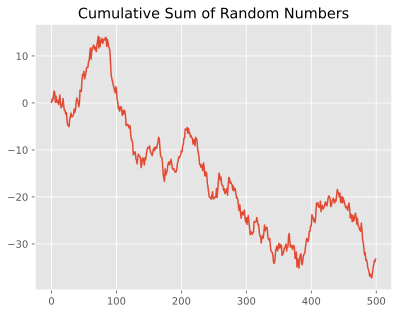

In [32]:
# Plotting the cumulative sum of a smaller set of random numbers

# Draws 500 random samples from a standard normal distribution
rand_small_arr = rng.standard_normal(500)

plt.plot(rand_small_arr.cumsum())
plt.title("Cumulative Sum of Random Numbers")
plt.show()

As the number of randomly generated numbers increases, the cumulative sum should approach zero. This behavior reflects the Law of Large Numbers, where positive and negative values cancel each other out over time.

## 3.3 Monte Carlo Simulation (MCS)

Monte Carlo Simulation (MCS) is a powerful computational technique that leverages probability and statistics to model the potential outcomes of a complex system with inherent uncertainty. By simulating a large number of random scenarios, MCS helps to quantify risk, assess probability distributions, and make informed decisions.

In finance, Monte Carlo simulations are indispensable for:

**Investment analysis:** Predicting future asset prices, portfolio returns, and the likelihood of different investment outcomes.
**Option pricing:** Determining fair values for options by simulating the underlying asset's price paths.
**Risk management:** Assessing potential losses, calculating Value at Risk (VaR), and optimizing portfolio allocations.
**Financial planning:** Modeling retirement savings, insurance needs, and other long-term financial goals.

### 3.3.1 Simulating a Stock Price Process

We'll use the historical volatility of the fetched stock prices to simulate a stock price process.

**Parameters**

In [33]:
S0 = df["MSFT"].iloc[0]  # Initial stock price
T = 1.0  # Time to maturity (1 year)
r = 0.05  # Risk-free rate
sigma = df["MSFT"].pct_change().std() * np.sqrt(252)  # Annualized volatility

What if we could observe thousands of boats launching downstream before creating the context for stock prices? Just as each boat's path is influenced by the river's current and waves, stock prices are influenced by drift (expected return) and volatility (random fluctuations). By simulating many paths, we can estimate the range of possible outcomes.

### Simulation Settings

#### Geometric Brownian Motion (GBM)

Imagine a stock price as a tiny particle moving randomly. GBM is a mathematical model that describes how this particle might move over time. It assumes that the stock price follows a random path but with a general tendency to increase (or decrease) over time. This tendency is called the drift, and the random fluctuations around this trend are called volatility.

Think of it like a boat on a river. The river's current represents the drift, pushing the boat forward. However, the boat also gets jostled by waves (volatility), causing it to move up and down randomly.

In [34]:
# Iteratively calculating the stock prices using the geometric Brownian motion model

M = 50  # Number of time steps
I = 20_000  # Number of iterations (simulations)

# Calculates time step size. Divides the total time to maturity (T) by the number of time steps (M).
dt = T / M

# Initializing the stock price matrix
S = np.zeros((M + 1, I))
S[0] = S0  # Setting the initial stock price for all simulations

#### Code Breakdown:
Here, I stands for iterations , representing the number of simulations to run. Each iteration simulates a possible stock price path.

In [35]:
# Generating random numbers for the simulation
rn = rng.standard_normal((M + 1, I))

# Simulating the stock price paths
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t])

#### Code Breakdown:
The very last time step (t = M) corresponds to the time to maturity (T). At this point, the simulated stock prices represent their values at the end of the simulation period.

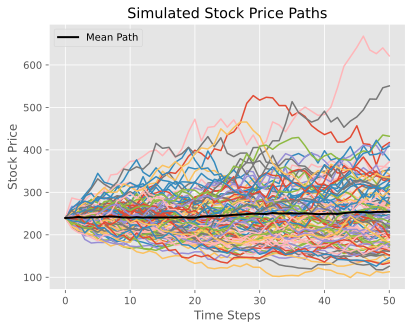

Expected stock price at maturity: 252.20


In [36]:
# Plotting the stock price paths

plt.plot(S[:, :100])  # Plotting the first 100 simulations
plt.plot(S[:, :100].mean(axis=1), lw=2, color='black', label='Mean Path')  # Mean path
plt.title("Simulated Stock Price Paths")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# Expected stock price at maturity
expected_S_T = S[-1].mean()
print(f"Expected stock price at maturity: {expected_S_T:.2f}")

##  3.4 Summary 

This chapter introduces **NumPy**, a powerful Python library for numerical operations, essential for financial analysts and quantitative traders due to its efficiency in handling large datasets. Key learning outcomes include:

#### Key learning outcomes include:
- **Data Manipulation:** Efficiently manage financial data using NumPy arrays.
- **Statistical Analysis:** Calculate metrics like moving averages, correlations, and risk measures.
- **Financial Simulations:** Build Monte Carlo simulations to predict asset prices and assess scenarios.
- **Monte Carlo methods:** Simulate market conditions and optimize portfolios.